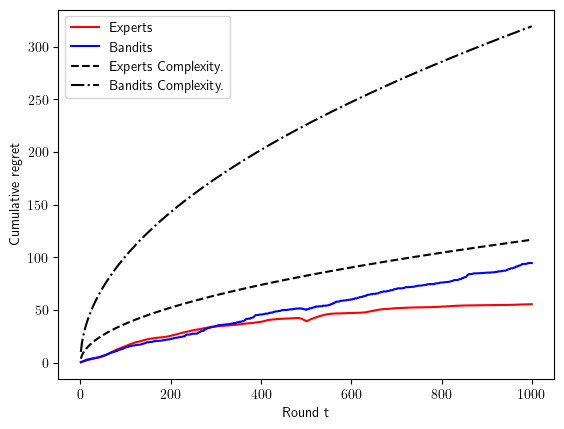

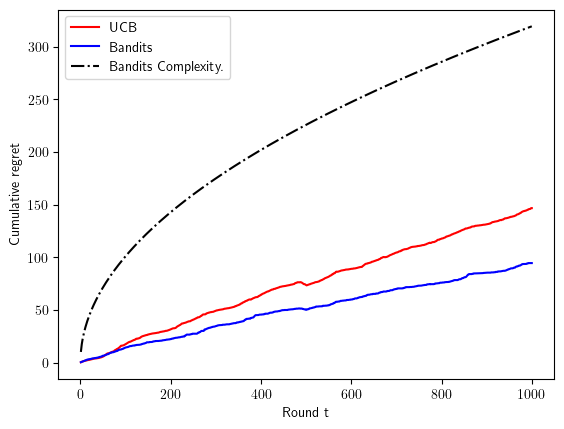

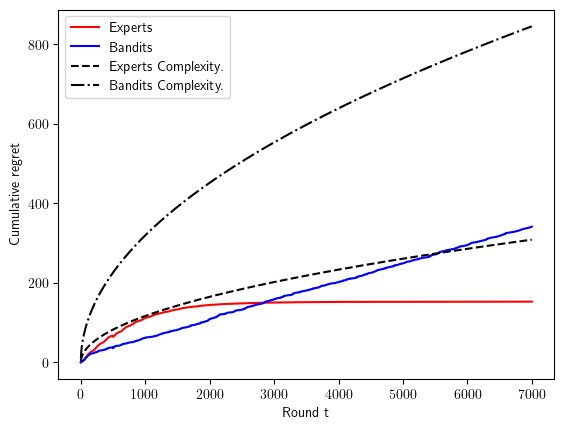

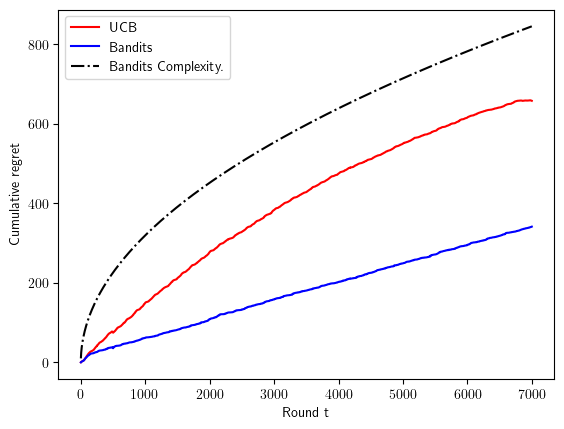

In [4]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['text.usetex'] = True
import pandas as pd 
import random

#Load Dataset
file = open('Milano_timeseries.csv')
dataset = np.loadtxt(file,delimiter=',',dtype=float)
k = dataset.shape[0]
T = 1000
       
def mw_experts(data, k, T, h):
    w = np.ones((k,)) #Initial expert weights
    
    loss = np.zeros((k,T)) #Expert loss at time t
    
    L = np.zeros((k,T))
    L_pl = np.zeros((T,)) 
    L_opt = np.zeros((T,))
    
    for t in range(T):
        p = w/np.sum(w) #Expert probabilities at time t
        exp_i = np.random.choice(range(k),p=p).astype(int) # Choose expert i with probability p
        
        loss[:,t] = data[:,t]-np.min(data[:,t])
        
        w = (1-h)**loss[:,t] * w
        
        L_pl[t] = np.sum(p*loss[:,t])
        # L_opt[t] = np.min(loss[:,t])
    
    L = np.cumsum(loss,axis=1)
    L_opt = np.min(L,axis=0)
    L_alg = np.cumsum(L_pl)
    Regret = L_alg - L_opt
    
    return Regret 

def mw_bandits(data, k, T, h, epsilon):
    w = np.ones((k,)) #Initial expert weights
    
    loss = np.zeros((k,T)) #Expert loss at time t
    loss2 = np.zeros((k,T))
    
    L = np.zeros((T,))
    
    L_ql = np.zeros((T,)) 
    L_opt = np.zeros((T,))
    
    for t in range(T):
        p = w/np.sum(w) #Expert probabilities at time t
        q = (1-epsilon)*p + epsilon/k #bandit probabilities at time t
        arm_i = np.random.choice(range(k),p=q).astype(int) # Choose arm i with probability q
        
        min_data = np.min(data[:,t])
        loss[arm_i,t] = (data[arm_i,t]-min_data)/q[arm_i]
        loss2[:,t] = (data[:,t]-min_data)
        
        w = (1-h)**loss[:,t] * w
        
        L_ql[t] = q[arm_i]*loss[arm_i,t]
    
    L = np.cumsum(loss2,axis=1)
    L_opt = np.min(L,axis=0)
    L_alg = np.cumsum(L_ql)
    Regret = L_alg - L_opt
    return Regret

def ucb_alg(data, k, T):  
    X = np.zeros((k,T))
    Q = np.zeros((k,))
    mu = np.zeros((k,))
    ucb = np.zeros((k,)) + np.Inf
    r = np.zeros((k,T))
    
    loss = np.zeros((k,T))
    l_i = np.zeros((T,)) 
    L_opt = np.zeros((T,))
    
    for t in range(T):
        arm_i = np.argmax(ucb)
        
        X[arm_i,t] = 1
        Q[arm_i] = np.sum(X[arm_i,:])
        
        min_data = np.min(data[:,t])
        loss[:,t] = (data[:,t]-min_data)
        r[arm_i,t] = loss[arm_i,t]
        
        mu[arm_i] = np.sum(r[arm_i,:]*X[arm_i,:])/Q[arm_i]
        ucb[arm_i] = -mu[arm_i] + np.sqrt(np.log(T)/Q[arm_i])
        
        l_i[t] = loss[arm_i,t]

    L = np.cumsum(loss,axis=1)
    L_opt = np.min(L,axis=0)
    L_alg = np.cumsum(l_i)
    Regret = L_alg - L_opt
    
    return Regret

Regret_mwe = mw_experts(dataset,k,T,np.sqrt(np.log(k)/T))
Regret_mwb = mw_bandits(dataset, k, T, ((k*np.log(k))/T)**(1/3), ((k*np.log(k))/T)**(1/3))
Regret_ucb = ucb_alg(dataset, k, T)

fig1 = plt.figure()
plt.plot( np.arange(1,T+1), Regret_mwe,'r',label='Experts')
plt.plot( np.arange(1,T+1), Regret_mwb,'b',label='Bandits')
plt.plot( np.arange(1,T+1), 2*np.sqrt(np.log(k)*np.arange(1,T+1)),'--k',label='Experts Complexity.')
plt.plot( np.arange(1,T+1), np.sqrt(k*np.log(k)*np.arange(1,T+1)),'-.k',label='Bandits Complexity.')
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.show()
#   plt.savefig('fig1.png')

fig2 = plt.figure()
plt.plot( np.arange(1,T+1), Regret_ucb,'r',label='UCB')
plt.plot( np.arange(1,T+1), Regret_mwb,'b',label='Bandits')
#plt.plot( np.arange(1,T+1), np.sqrt(np.arange(1,T+1)),'k',label='UCB Complex.')
plt.plot( np.arange(1,T+1), np.sqrt(k*np.log(k)*np.arange(1,T+1)),'-.k',label='Bandits Complexity.')
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.show()
#plt.savefig('fig2.png')

T = 7000
Regret_mwe = mw_experts(dataset,k,T,np.sqrt(np.log(k)/T))
Regret_mwb = mw_bandits(dataset, k, T, ((k*np.log(k))/T)**(1/3), ((k*np.log(k))/T)**(1/3))
Regret_ucb = ucb_alg(dataset, k, T)

fig3 = plt.figure()
plt.plot( np.arange(1,T+1), Regret_mwe,'r',label='Experts')
plt.plot( np.arange(1,T+1), Regret_mwb,'b',label='Bandits')
plt.plot( np.arange(1,T+1), 2*np.sqrt(np.log(k)*np.arange(1,T+1)),'--k',label='Experts Complexity.')
plt.plot( np.arange(1,T+1), np.sqrt(k*np.log(k)*np.arange(1,T+1)),'-.k',label='Bandits Complexity.')
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.show()
#plt.savefig('fig3.png')

fig4 = plt.figure()
plt.plot( np.arange(1,T+1), Regret_ucb,'r',label='UCB')
plt.plot( np.arange(1,T+1), Regret_mwb,'b',label='Bandits')
#plt.plot( np.arange(1,T+1), np.sqrt(np.arange(1,T+1)),'k',label='UCB Complex.')
plt.plot( np.arange(1,T+1), np.sqrt(k*np.log(k)*np.arange(1,T+1)),'-.k',label='Bandits Complexity.')
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.show()
#plt.savefig('fig4.png')